In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

dataset_path = 'dataset/Vehicles'
resized_dataset_path = 'Resize_dataSet'

target_size = (224, 224)

os.makedirs(resized_dataset_path, exist_ok=True)
for cls in os.listdir(dataset_path):
    os.makedirs(os.path.join(resized_dataset_path, cls), exist_ok=True)

# Preparation des images
for cls in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, cls)
    save_class_path = os.path.join(resized_dataset_path, cls)

    for img_name in os.listdir(class_path):
        try:
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(target_size)
            img.save(os.path.join(save_class_path, img_name))
        except Exception as e:
            print(f"Error resizing {img_name} in {cls}: {e}")


# Image parameteres
img_height, img_width = 224, 224
batch_size = 32
num_classes = 8

Error resizing Bus7.avif in Bus: cannot identify image file 'C:\\Users\\dell\\OneDrive\\Desktop\\ML projet\\dataset\\Vehicles\\Bus\\Bus7.avif'


c:\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error resizing Truck0.avif in Truck: cannot identify image file 'C:\\Users\\dell\\OneDrive\\Desktop\\ML projet\\dataset\\Vehicles\\Truck\\Truck0.avif'


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.2
)

In [3]:
train_generator = train_datagen.flow_from_directory(
    resized_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 3996 images belonging to 8 classes.


In [4]:
validation_generator = train_datagen.flow_from_directory(
    resized_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 997 images belonging to 8 classes.


In [5]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_schedule = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    verbose=1,
    min_lr=1e-6
)


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,793,064 (10.65 MB)

 Trainable params: 2,793,064 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
epochs = 35
# Entrainement du modele
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop, lr_schedule]
)


C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.2020 - loss: 2.0035

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 625ms/step - accuracy: 0.2024 - loss: 2.0026 - val_accuracy: 0.4774 - val_loss: 1.5800 - learning_rate: 0.0010
Epoch 2/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 605ms/step - accuracy: 0.3615 - loss: 1.6469 - val_accuracy: 0.5246 - val_loss: 1.4230 - learning_rate: 0.0010
Epoch 3/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 642ms/step - accuracy: 0.4409 - loss: 1.5404 - val_accuracy: 0.5827 - val_loss: 1.3458 - learning_rate: 0.0010
Epoch 4/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 125s 999ms/step - accuracy: 0.4435 - loss: 1.4904 - val_accuracy: 0.5165 - val_loss: 1.3689 - learning_rate: 0.0010
Epoch 5/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 121s 964ms/step - accuracy: 0.4760 - loss: 1.4723 - val_accuracy: 0.5386 - val_loss: 1.3289 - learning_rate: 0.0010
Epoch 6/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 121s 969ms/step - accuracy: 0.4942 - loss: 1.4276 - val_accuracy: 0.5868 - val_loss: 1.2304 - learning_rate: 0.0010
Epoch 7/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 121s 968ms/step - accuracy: 0.5497 - l

In [ ]:
model.save('model1.keras')

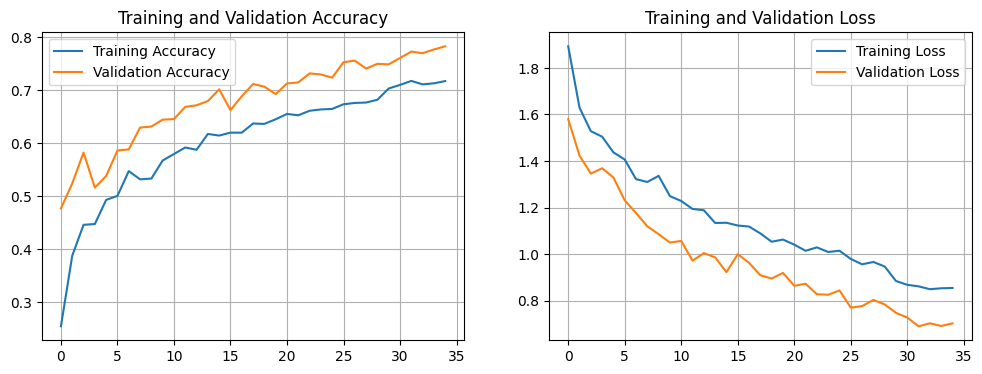

In [11]:
# Graphe de training et validation accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.savefig('training_plots.png')


In [12]:
# Evalualtion du modele
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 647ms/step - accuracy: 0.7748 - loss: 0.6802
Validation Loss: 0.7026583552360535
Validation Accuracy: 0.7743229866027832


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted class: Truck


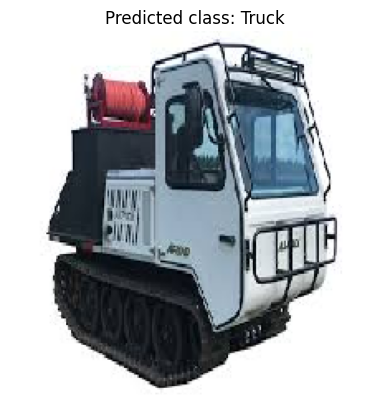

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

class_names = ['Bus', 'Cars', 'Truck', 'Motorcycles','Bikes','Planes','Ships','Trains']

img_path = 'test/track2.jpeg'

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

model_load = load_model("model1.keras")

predictions = model_load.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

print(f"Predicted class: {predicted_class}")
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()
